In [151]:
#MSE vs サーチケース
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

#reaction length
df = pd.read_excel('/mnt/c/CEA/all_mixtureexp15.xlsx')

l1=['Fuel','Diluent','Equivalentratio','CoefficientDiluent','Oxidizer','diluentratio','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]','Lr','Lc']

XpcaFLRDED = pd.DataFrame({'P0':df['P0']})

for i in range(len(l1)):
    XpcaFLRDED[l1[i]]=df[l1[i]]

XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'Ar') | ~( XpcaFLRDED['Lc'] ==  5)]
XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'Ar') | ~( XpcaFLRDED['Lc'] ==  10)]
#XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'Ar') | ~( XpcaFLRDED['Lc'] ==  20)]
XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Diluent'] == 'Kr')]

print(len(XpcaFLRDED[( XpcaFLRDED['Fuel'] == 'C2H2') & ( XpcaFLRDED['Diluent'] == 'Ar')]))

dfC2H2N2train = XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'N2')]
dfC2H2N2test = XpcaFLRDED[( XpcaFLRDED['Fuel'] == 'C2H2') & ( XpcaFLRDED['Diluent'] == 'N2')]

dfC2H2Hetrain = dfC2H2N2train[~( dfC2H2N2train['Fuel'] == 'C2H2') | ~( dfC2H2N2train['Diluent'] == 'He')]
dfC2H2Hetest = dfC2H2N2train[( dfC2H2N2train['Fuel'] == 'C2H2') & ( dfC2H2N2train['Diluent'] == 'He')]

dfC2H6N2Otrain =  dfC2H2Hetrain[~( dfC2H2Hetrain['Fuel'] == 'C2H6') | ~( dfC2H2Hetrain['Oxidizer'] == 'N2O')]
dfC2H6N2Otest = dfC2H2Hetrain[( dfC2H2Hetrain['Fuel'] == 'C2H6') & ( dfC2H2Hetrain['Oxidizer'] == 'N2O')]

dfC3H6O2train =  dfC2H6N2Otrain[~( dfC2H6N2Otrain['Fuel'] == 'C3H6') | ~( dfC2H6N2Otrain['Oxidizer'] == 'O2')]
dfC3H6O2test = dfC2H6N2Otrain[( dfC2H6N2Otrain['Fuel'] == 'C3H6') & ( dfC2H6N2Otrain['Oxidizer'] == 'O2')]

dfC3H6N2Otrain =  dfC3H6O2train[~( dfC3H6O2train['Fuel'] == 'C3H6') | ~( dfC3H6O2train['Oxidizer'] == 'N2O')]
dfC3H6N2Otest = dfC3H6O2train[( dfC3H6O2train['Fuel'] == 'C3H6') & ( dfC3H6O2train['Oxidizer'] == 'N2O')]

#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'H2')]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'H2')]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'H2')]['P0'].min(),'H2')
#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent'].isnull())]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].min(),'C2H2')
print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent']=='Ar')]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent']=='Ar')]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H2') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].min(),'C2H2AR')
#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent'].isnull())]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].min(),'C2H4')
#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent']=='Ar')]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent']=='Ar')]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H4') & (dfC3H6N2Otrain['Diluent'].isnull())]['P0'].min(),'C2H4AR')
#print(len(dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H6')]),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H6')]['P0'].max(),dfC3H6N2Otrain[( dfC3H6N2Otrain['Fuel'] == 'C2H6')]['P0'].min(),'C2H6')

dftrainval = dfC3H6N2Otrain.sample(frac=1)
P0range = '0.6>P0>0.3'
P0range1 = '0.6>P0>0.3'

#P0range1 = '0.3>P0>0.25'
#P0range2 = '0.4>P0>0.25'
#P0range3 = '0.6>P0>0.5'
#P0range4 = '0.5>P0>0.40'

dfC2H2N2test = dfC2H2N2test.query(P0range1)
dfC2H2Hetest = dfC2H2Hetest.query(P0range1)
dfC2H6N2Otest = dfC2H6N2Otest.query(P0range1)
dfC3H6O2test = dfC3H6O2test.query(P0range1)
#dfC3H6O2test = dfC3H6O2test[( dfC3H6O2test['Equivalentratio'] == 1)]
dfC3H6N2Otest = dfC3H6N2Otest.query(P0range1)

X_train = dftrainval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC2H2N2test = dfC2H2N2test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC2H2Hetest = dfC2H2Hetest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC2H6N2Otest = dfC2H6N2Otest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC3H6O2test  = dfC3H6O2test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC3H6N2Otest  = dfC3H6N2Otest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])

y_train = dftrainval['Lr']
yC2H2N2test = dfC2H2N2test['Lr']
yC2H2Hetest = dfC2H2Hetest['Lr']
yC2H6N2Otest = dfC2H6N2Otest['Lr']
yC3H6O2test = dfC3H6O2test['Lr']
yC3H6N2Otest = dfC3H6N2Otest['Lr']


print(len(XC2H2N2test),XC2H2N2test['P0'].max(),XC2H2N2test['P0'].min(),'C2H2N2')
print(len(XC2H2Hetest),XC2H2Hetest['P0'].max(),XC2H2Hetest['P0'].min(),'C2H2He')
print(len(XC2H6N2Otest),XC2H6N2Otest['P0'].max(),XC2H6N2Otest['P0'].min(),'C2H6N2O')
print(len(XC3H6O2test),XC3H6O2test['P0'].max(),XC3H6O2test['P0'].min(),'C3H6O2')
print(len(XC3H6N2Otest),XC3H6N2Otest['P0'].max(),XC3H6N2Otest['P0'].min(),'C3H6N2O')

#print(yC2H2N2test,'C2H2N2')
#print(yC2H2Hetest,'C2H2He')
#print(yC2H6N2Otest,'C2H6N2O')
#print(yC3H6O2test,'C3H6O2')
#print(yC3H6N2Otest,'C3H6N2O')


ss = StandardScaler()
sX_train = ss.fit_transform(X_train)
sX_train = pd.DataFrame(sX_train,columns=X_train.columns)


116
116 1.002 0.049 C2H2AR
2 0.5997 0.501 C2H2N2
3 0.5007 0.3045 C2H2He
5 0.5853 0.4851 C2H6N2O
11 0.5001 0.3135 C3H6O2
4 0.5316 0.4284000000000001 C3H6N2O


In [152]:

sol = ['adam']
act = ['relu']
hidd = []

for i in [4]:
    for j in [200]:
        b=[j]*i
        b=tuple(b)
        hidd.append(b)

alp=[1e-4]
param_grid = {'solver':sol,'activation':act,'hidden_layer_sizes':hidd,'alpha':alp}
grid1=GridSearchCV(MLPRegressor(), param_grid ,cv=2, n_jobs=4)
grid1.fit(sX_train,y_train)

print('Best parameters: {}'.format(grid1.best_params_))
print('Best cross-validation: {}'.format(grid1.best_score_))

/home/hiroki/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200, 200, 200), 'solver': 'adam'}
Best cross-validation: 0.9430645214227864


In [153]:
dfH2trainval = dftrainval[(dftrainval['Fuel'] == 'H2')]
dfC2H2tarinval = dftrainval[(dftrainval['Fuel'] == 'C2H2') & (dftrainval['Diluent'].isnull())]
dfC2H2ARtrainval = dftrainval[(dftrainval['Fuel'] == 'C2H2') & (dftrainval['Diluent'] == 'Ar')]
dfC2H4trainval = dftrainval[(dftrainval['Fuel'] == 'C2H4') & (dftrainval['Diluent'].isnull())]
dfC2H4ARtrainval = dftrainval[( dftrainval['Fuel'] == 'C2H4') & ( dftrainval['Diluent'] == 'Ar')]
dfC2H6trainval = dftrainval[( dftrainval['Fuel'] == 'C2H6')]

X_H2 = dfH2trainval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
X_C2H2 = dfC2H2tarinval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
X_C2H2AR = dfC2H2ARtrainval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
X_C2H4 = dfC2H4trainval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
X_C2H4AR = dfC2H4ARtrainval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
X_C2H6 = dfC2H6trainval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])

y_H2 = dfH2trainval['Lr']
y_C2H2 = dfC2H2tarinval['Lr']
y_C2H2AR = dfC2H2ARtrainval['Lr']
y_C2H4 = dfC2H4trainval['Lr']
y_C2H4AR = dfC2H4ARtrainval['Lr']
y_C2H6 = dfC2H6trainval['Lr']

sX_H2 = ss.transform(X_H2)
sX_C2H2 = ss.transform(X_C2H2)
sX_C2H2AR = ss.transform(X_C2H2AR)
sX_C2H4 = ss.transform(X_C2H4)
sX_C2H4AR = ss.transform(X_C2H4AR)
sX_C2H6 = ss.transform(X_C2H6)

In [154]:
resultH2 = grid1.predict(sX_H2)
R2H2 = r2_score(y_H2,resultH2)

resultC2H2 = grid1.predict(sX_C2H2)
R2C2H2 = r2_score(y_C2H2,resultC2H2)

resultC2H2AR = grid1.predict(sX_C2H2AR)
R2C2H2AR = r2_score(y_C2H2AR,resultC2H2AR)

resultC2H4 = grid1.predict(sX_C2H4)
R2C2H4 = r2_score(y_C2H4,resultC2H4)

resultC2H4AR = grid1.predict(sX_C2H4AR)
R2C2H4AR = r2_score(y_C2H4AR,resultC2H4AR)

resultC2H6 = grid1.predict(sX_C2H6)
R2C2H6 = r2_score(y_C2H6,resultC2H6)

print(pd.DataFrame([[R2H2], [R2C2H2], [R2C2H2AR],[R2C2H4],[R2C2H4AR],[R2C2H6]],
                   columns=['R2'],
                   index=['H2', 'C2H2','C2H2AR','C2H4','C2H4AR','C2H6']))

              R2
H2      0.905717
C2H2    0.974485
C2H2AR  0.961736
C2H4    0.948521
C2H4AR  0.873486
C2H6    0.937215


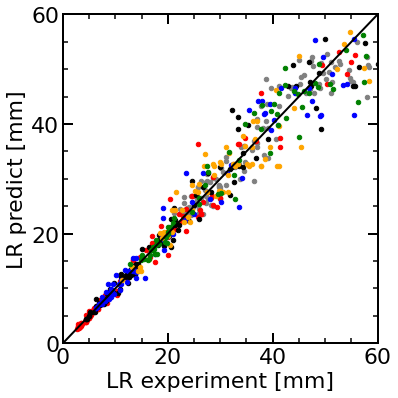

In [155]:
plt.figure(figsize=(6,6))

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.plot([0, 60], [0, 60],color='black')

plt.scatter(y_H2,resultH2,s=20,color='grey')
plt.scatter(y_C2H2,resultC2H2,s=20,color='red')
plt.scatter(y_C2H2AR,resultC2H2AR,s=20,color='black')
plt.scatter(y_C2H4,resultC2H4,s=20,color='blue')
plt.scatter(y_C2H4AR,resultC2H4AR,s=20,color='orange')
plt.scatter(y_C2H6,resultC2H6,s=20,color='green')

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()

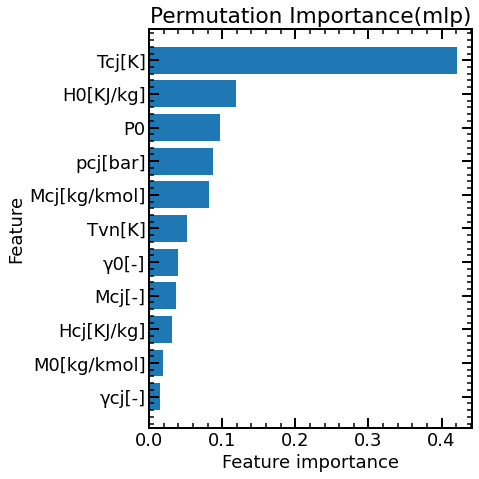

In [156]:
def plot_feature_importance(df):
    n_features = len(df)
    df_plot = df.sort_values('importance')
    f_importance_plot = df_plot['importance'].values
    plt.barh(range(n_features), f_importance_plot, align='center')
    cols_plot = df_plot['feature'].values
    plt.yticks(np.arange(n_features), cols_plot)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

result = permutation_importance(grid1,sX_train,y_train, n_repeats=5, random_state=42)

cols = list(sX_train.columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(result["importances"].mean(axis=1)) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df1=df_importance
df_importance = df_importance.sort_values("importance",ascending=False)

plt.figure(figsize=(7,7))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

# Tick Setting
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
#sns.barplot(x="Importance", y="Features",data=df_importance,ci=None)
plot_feature_importance(df_importance)
plt.title("Permutation Importance(mlp)")
plt.tight_layout()

/tmp/ipykernel_243/386355514.py:182: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 130)
/tmp/ipykernel_243/386355514.py:183: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 80)
/tmp/ipykernel_243/386355514.py:249: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 130)
/tmp/ipykernel_243/386355514.py:250: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 80)


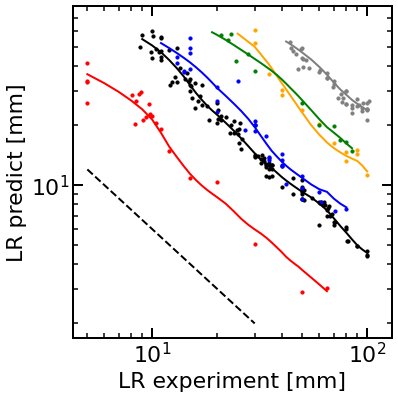

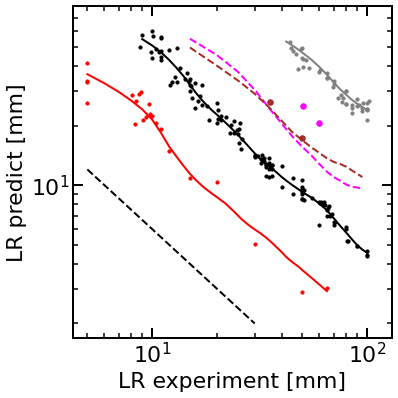

In [157]:
df3 = pd.read_excel('/mnt/c/CEA/data_comp_ppdhasegawa.xlsx')
df6 = pd.read_excel('/mnt/c/CEA/all_mixtureANNP0vslrC2H4Ar9.xlsx')
df7 = pd.read_excel('/mnt/c/CEA/all_mixture研究報告1210.xlsx')

df3 = df3.replace({'Fuel': {'C2H2,acetylene':'C2H2'}})
df7 = df7.replace({'Fuel': {'C2H2,acetylene':'C2H2'}})
df7 = df7.replace({'Fuel': {'C3H6,propylene':'C3H6'}})

l3=['Fuel','Diluent','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]']
l6=['Fuel','Diluent','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]']
l7=['Fuel','Diluent','Oxidizer','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]']

XpcaFLRDED3 = pd.DataFrame({'P0':df3['P0']})
XpcaFLRDED6 = pd.DataFrame({'P0':df6['P0']})
XpcaFLRDED7 = pd.DataFrame({'P0':df7['P0']})

for i in range(len(l3)):
    XpcaFLRDED3[l3[i]]=df3[l3[i]]
for i in range(len(l6)):
    XpcaFLRDED6[l6[i]]=df6[l6[i]]
for i in range(len(l7)):
    XpcaFLRDED7[l7[i]]=df7[l7[i]]

dfH2 = XpcaFLRDED3[(XpcaFLRDED3['Fuel'] == 'H2')]
dfH2 = dfH2.query('1.05>P0>0.40')
XH2=dfH2.drop(columns=['Fuel','Diluent'])

dfC2H2 = XpcaFLRDED3[(XpcaFLRDED3['Fuel'] == 'C2H2') & (XpcaFLRDED3['Diluent'].isnull()) ]
dfC2H2 = dfC2H2.query('0.7>P0>0.03')
XC2H2=dfC2H2.drop(columns=['Fuel','Diluent'])

dfC2H2Ar = XpcaFLRDED3[(XpcaFLRDED3['Fuel'] == 'C2H2') & (XpcaFLRDED3['Diluent'] == 'Ar')]
dfC2H2Ar = dfC2H2Ar.query('1.05>P0>0.08')
XC2H2Ar=dfC2H2Ar.drop(columns=['Fuel','Diluent'])

dfC2H4 = XpcaFLRDED3[(XpcaFLRDED3['Fuel'] == 'C2H4') & (XpcaFLRDED3['Diluent'].isnull()) ]
dfC2H4 = dfC2H4.query('0.83>P0>0.10')
XC2H4=dfC2H4.drop(columns=['Fuel','Diluent'])

dfC2H4Ar = XpcaFLRDED6[(XpcaFLRDED6['Fuel'] == 'C2H4') & (XpcaFLRDED6['Diluent'] == 'Ar')]
dfC2H4Ar = dfC2H4Ar.query('1.05>P0>0.2')
XC2H4Ar=dfC2H4Ar.drop(columns=['Fuel','Diluent'])

dfC2H6 = XpcaFLRDED3[(XpcaFLRDED3['Fuel'] == 'C2H6') & (XpcaFLRDED3['Diluent'].isnull()) ]
dfC2H6 = dfC2H6.query('0.88>P0>0.18')
XC2H6=dfC2H6.drop(columns=['Fuel','Diluent'])

dfC2H2N2 = XpcaFLRDED7[(XpcaFLRDED7['Fuel'] == 'C2H2') & (XpcaFLRDED7['Diluent'] == 'N2')]
dfC2H2N2 = dfC2H2N2.query('1.0>P0>0.1')
XC2H2N2=dfC2H2N2.drop(columns=['Fuel','Diluent','Oxidizer'])

dfC3H6 = XpcaFLRDED7[(XpcaFLRDED7['Fuel'] == 'C3H6') & (XpcaFLRDED7['Oxidizer'] == 'O2')]
dfC3H6 = dfC3H6.query('1.0>P0>0.1')
XC3H6=dfC3H6.drop(columns=['Fuel','Diluent','Oxidizer'])

sXH2 = ss.transform(XH2)
sXC2H2 = ss.transform(XC2H2)
sXC2H2Ar = ss.transform(XC2H2Ar)
sXC2H4 = ss.transform(XC2H4)
sXC2H4Ar = ss.transform(XC2H4Ar)
sXC2H6 = ss.transform(XC2H6)
sXC2H2N2 = ss.transform(XC2H2N2)
sXC3H6 = ss.transform(XC3H6)

resultH2=grid1.predict(sXH2)
resultC2H2=grid1.predict(sXC2H2)
resultC2H4=grid1.predict(sXC2H4)
resultC2H6=grid1.predict(sXC2H6)
resultC2H2AR=grid1.predict(sXC2H2Ar)
resultC2H4AR=grid1.predict(sXC2H4Ar)
resultC2H2N2=grid1.predict(sXC2H2N2)
resultC3H6=grid1.predict(sXC3H6)

dfH2E1 = dftrainval[(dftrainval['Fuel'] == 'H2') & ( dftrainval['Equivalentratio'] == 1)]
dfC2H2E1 = dftrainval[(dftrainval['Fuel'] == 'C2H2') & (dftrainval['Diluent'].isnull()) & ( dftrainval['Equivalentratio'] == 1)]
dfC2H2AR50 = dftrainval[(dftrainval['Fuel'] == 'C2H2') & (dftrainval['Diluent'] == 'Ar') & (dftrainval['diluentratio'] == 50)]
dfC2H4E1 = dftrainval[(dftrainval['Fuel'] == 'C2H4') & (dftrainval['Diluent'].isnull()) & ( dftrainval['Equivalentratio'] == 1)]
dfC2H4AR50 = dftrainval[( dftrainval['Fuel'] == 'C2H4') & ( dftrainval['Diluent'] == 'Ar') & (dftrainval['diluentratio'] == 50)]
dfC2H6E1 = dftrainval[( dftrainval['Fuel'] == 'C2H6') & ( dftrainval['Equivalentratio'] == 1)]
dfC3H6E1 = dfC3H6O2test[( dfC3H6O2test['Fuel'] == 'C3H6') & ( dfC3H6O2test['Equivalentratio'] == 1)]

XH2E1 = dfH2E1.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC2H2E1 = dfC2H2E1.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC2H2AR50 = dfC2H2AR50.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC2H4E1 = dfC2H4E1.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC2H4AR50 = dfC2H4AR50.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC2H6E1 = dfC2H6E1.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC2H2N250 = XC2H2N2test 
XC3H6E1 = dfC3H6E1.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])

yH2E1 = dfH2E1['Lr']
yC2H2E1 = dfC2H2E1['Lr']
yC2H2AR50 = dfC2H2AR50['Lr']
yC2H4E1 = dfC2H4E1['Lr']
yC2H4AR50 = dfC2H4AR50['Lr']
yC2H6E1 = dfC2H6E1['Lr']
yC2H2N250 = yC2H2N2test 
yC3H6E1 = dfC3H6E1['Lr']

def calc_double(n):
    return n*100

XH2E1['P0'] = list(map(calc_double,XH2E1['P0']))
XH2['P0'] = list(map(calc_double,XH2['P0']))

XC2H2E1['P0']= list(map(calc_double,XC2H2E1['P0']))
XC2H2['P0'] = list(map(calc_double,XC2H2['P0']))

XC2H2AR50['P0'] = list(map(calc_double,XC2H2AR50['P0']))
XC2H2Ar['P0'] = list(map(calc_double,XC2H2Ar['P0']))

XC2H4E1['P0'] = list(map(calc_double,XC2H4E1['P0']))
XC2H4['P0']= list(map(calc_double,XC2H4['P0']))

XC2H4AR50['P0'] = list(map(calc_double,XC2H4AR50['P0']))
XC2H4Ar['P0'] = list(map(calc_double,XC2H4Ar['P0']))

XC2H6E1['P0'] = list(map(calc_double,XC2H6E1['P0']))
XC2H6['P0'] = list(map(calc_double,XC2H6['P0']))

XC2H2N250['P0'] = list(map(calc_double,XC2H2N250['P0']))
XC2H2N2['P0'] = list(map(calc_double,XC2H2N2['P0']))

XC3H6E1['P0'] = list(map(calc_double,XC3H6E1['P0']))
XC3H6['P0'] = list(map(calc_double,XC3H6['P0']))

plt.figure(figsize=(6,6))

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(XH2E1['P0'],yH2E1,s=10,color='grey')
plt.plot(XH2['P0'],resultH2,color='grey')

plt.scatter(XC2H2E1['P0'],yC2H2E1,s=10,color='red')
plt.plot(XC2H2['P0'],resultC2H2,color='red')

plt.scatter(XC2H2AR50['P0'],yC2H2AR50,s=10,color='black')
plt.plot(XC2H2Ar['P0'],resultC2H2AR,color='black')

plt.scatter(XC2H4E1['P0'],yC2H4E1,s=10,color='blue')
plt.plot(XC2H4['P0'],resultC2H4,color='blue')

plt.scatter(XC2H4AR50['P0'],yC2H4AR50,s=10,color='orange')
plt.plot(XC2H4Ar['P0'],resultC2H4AR,color='orange')

plt.scatter(XC2H6E1['P0'],yC2H6E1,s=10,color='green')
plt.plot(XC2H6['P0'],resultC2H6,color='green')

x = np.linspace(5, 30, 10)
y = 60/x
plt.plot(x,y,color='black',linestyle='dashed')
ax = plt.gca()
#ax.spines['top'].set_color('none')
##
ax.set_yscale('log')  # メイン: y軸をlogスケールで描く
ax.set_xscale('log')
plt.xlim(0, 130)
plt.ylim(0, 80)
#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 161, step=40))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu5.png")

plt.figure(figsize=(6,6))

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(XH2E1['P0'],yH2E1,s=10,color='grey')
plt.plot(XH2['P0'],resultH2,color='grey')

plt.scatter(XC2H2E1['P0'],yC2H2E1,s=10,color='red')
plt.plot(XC2H2['P0'],resultC2H2,color='red')

plt.scatter(XC2H2AR50['P0'],yC2H2AR50,s=10,color='black')
plt.plot(XC2H2Ar['P0'],resultC2H2AR,color='black')

#plt.scatter(XC2H4E1['P0'],yC2H4E1,s=10,color='blue')
#plt.plot(XC2H4['P0'],resultC2H4,color='blue')

#plt.scatter(XC2H4AR50['P0'],yC2H4AR50,s=10,color='orange')
#plt.plot(XC2H4Ar['P0'],resultC2H4AR,color='orange')

#plt.scatter(XC2H6E1['P0'],yC2H6E1,s=10,color='green')
#plt.plot(XC2H6['P0'],resultC2H6,color='green')

plt.scatter(XC2H2N250['P0'],yC2H2N250,s=30,color='Magenta')
plt.plot(XC2H2N2['P0'],resultC2H2N2,color='Magenta',linestyle='dashed')

plt.scatter(XC3H6E1['P0'],yC3H6E1,s=30,color='brown')
plt.plot(XC3H6['P0'],resultC3H6,color='brown',linestyle='dashed')

x = np.linspace(5, 30, 10)
y = 60/x
plt.plot(x,y,color='black',linestyle='dashed')
ax = plt.gca()
#ax.spines['top'].set_color('none')
##
ax.set_yscale('log')  # メイン: y軸をlogスケールで描く
ax.set_xscale('log')
plt.xlim(0, 130)
plt.ylim(0, 80)
#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 161, step=40))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu5.png")

In [158]:
#dftrainval1 = dftrainval[( dftrainval['Equivalentratio'] == 1)]
#dftrainval2 = dftrainval1[(dftrainval1['Diluent'].isnull()) | (dftrainval1['diluentratio'] == 50)]
X_train = dftrainval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
print(len(dftrainval))
X_train = X_train.query(P0range)
sX_train = ss.transform(X_train)
sXC2H2N2test = ss.transform(XC2H2N2test)
sXC2H2Hetest = ss.transform(XC2H2Hetest)
sXC2H6N2Otest = ss.transform(XC2H6N2Otest)
sXC3H6O2test = ss.transform(XC3H6O2test)
sXC3H6N2Otest = ss.transform(XC3H6N2Otest)

581


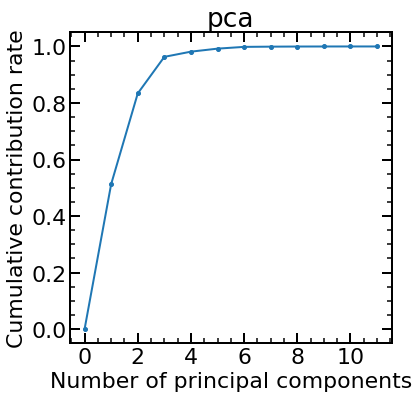

In [159]:
from sklearn.decomposition import PCA,KernelPCA
# データの分布を主成分分析（PCA）で表現してみる
pca = PCA()
#pca  = KernelPCA(n_components=2,  kernel='rbf', gamma=20.0)
X_train_pca = pca.fit_transform(sX_train)
X_testC2H2N2_pca = pca.transform(sXC2H2N2test)
X_testC2H2He_pca = pca.transform(sXC2H2Hetest)
X_testC2H6N2O_pca = pca.transform(sXC2H6N2Otest)
X_testC3H6O2_pca = pca.transform(sXC3H6O2test)
X_testC3H6N2O_pca = pca.transform(sXC3H6N2Otest)

import matplotlib.ticker as ticker
plt.figure(figsize=(6, 6))
plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.title("pca")
plt.tight_layout()
plt.savefig("gurafu2(研究報告).png")

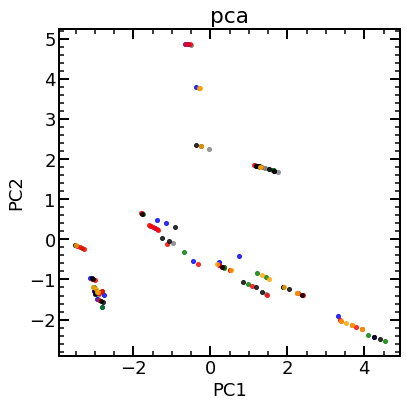

<Figure size 432x288 with 0 Axes>

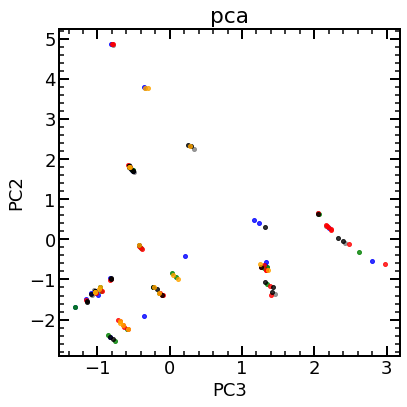

<Figure size 432x288 with 0 Axes>

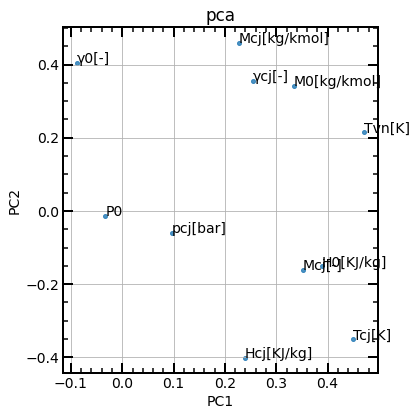

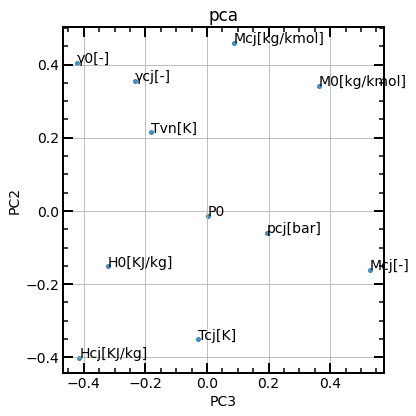

In [160]:
from sklearn.decomposition import PCA,KernelPCA
pca = PCA(n_components=4)

X_train_pca = pca.fit_transform(sX_train)
Diluent=list(dftrainval['Diluent'])
Fuel=list(dftrainval['Fuel'])
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
y6=[]
y7=[]
z1=[]
z2=[]
z3=[]
z4=[]
z5=[]
z6=[]
z7=[]
k1=[]
k2=[]
k3=[]
k4=[]
k5=[]
k6=[]
k7=[]
pc1=X_train_pca[:, 0]
pc2=X_train_pca[:, 1]
pc3=X_train_pca[:, 2]
pc4=X_train_pca[:, 3]

for i in range(len(sX_train)):
    if Fuel[i]=='H2':
        markers1='o'
        col1='grey'
        x1.append(pc1[i])
        y1.append(pc2[i])
        z1.append(pc3[i])
        k1.append(pc4[i])
    
    elif Fuel[i]=='C2H2':
    
        if Diluent[i]=='Ar':
            markers2='o'
            col2='red'
            x2.append(pc1[i])
            y2.append(pc2[i])
            z2.append(pc3[i])
            k2.append(pc4[i])

        else:
            markers3='o'
            col3='black'
            x3.append(pc1[i])
            y3.append(pc2[i])
            z3.append(pc3[i])
            k3.append(pc4[i])

    elif Fuel[i]=='C2H4':
        if Diluent[i]=='Ar':
            markers4='o'
            col4='blue'
            x4.append(pc1[i])
            y4.append(pc2[i])
            z4.append(pc3[i])
            k4.append(pc4[i])

        else:
            markers5='o'
            col5='orange'
            x5.append(pc1[i])
            y5.append(pc2[i])
            z5.append(pc3[i])
            k5.append(pc4[i])

    else:
        markers6='o'
        col6='green'
        x6.append(pc1[i])
        y6.append(pc2[i])
        z6.append(pc3[i])
        k6.append(pc4[i])

plt.figure(figsize=(6, 6))
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5


plt.scatter(x1,y1, alpha=0.8, c=col1,marker=markers1)
plt.scatter(x4,y4, alpha=0.8, c=col4,marker=markers4)
plt.scatter(x6,y6, alpha=0.8, c=col6,marker=markers6)
plt.scatter(x2,y2, alpha=0.8, c=col2,marker=markers2)
plt.scatter(x3,y3, alpha=0.8, c=col3,marker=markers3)
plt.scatter(x5,y5, alpha=0.8, c=col5,marker=markers5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("pca")
#plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("gurafu1(研究報告).png")

plt.figure(figsize=(6, 6))
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(z1,y1, alpha=0.8, c=col1,marker=markers1)
plt.scatter(z4,y4, alpha=0.8, c=col4,marker=markers4)
plt.scatter(z6,y6, alpha=0.8, c=col6,marker=markers6)
plt.scatter(z2,y2, alpha=0.8, c=col2,marker=markers2)
plt.scatter(z3,y3, alpha=0.8, c=col3,marker=markers3)
plt.scatter(z5,y5, alpha=0.8, c=col5,marker=markers5)
plt.xlabel("PC3")
plt.ylabel("PC2")
plt.title("pca")
#plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("gurafu1(研究報告).png")

plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
for x, y, name in zip(pca.components_[0], pca.components_[1], X_train.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("pca")
plt.grid(True)
plt.tight_layout()


plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
for x, y, name in zip(pca.components_[2], pca.components_[1], X_train.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[2], pca.components_[1], alpha=0.8)
plt.xlabel("PC3")
plt.ylabel("PC2")
plt.title("pca")
plt.grid(True)
plt.tight_layout()


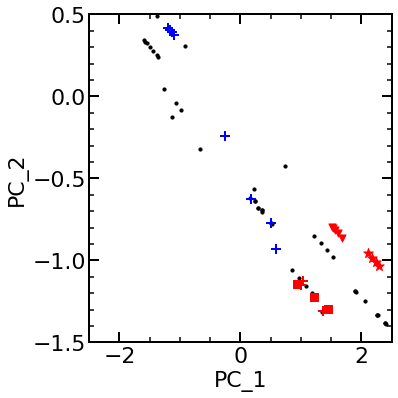

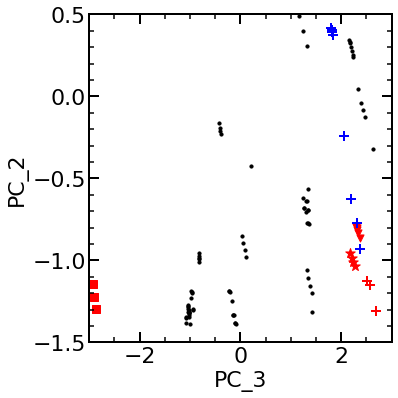

In [161]:
from sklearn.decomposition import PCA
# データの分布を主成分分析（PCA）で表現してみる
pca =  PCA(n_components=3)
X_train_pca = pca.fit_transform(sX_train)
X_testC2H2N2_pca = pca.transform(sXC2H2N2test)
X_testC2H2He_pca = pca.transform(sXC2H2Hetest)
X_testC2H6N2O_pca = pca.transform(sXC2H6N2Otest)
X_testC3H6O2_pca = pca.transform(sXC3H6O2test)
X_testC3H6N2O_pca = pca.transform(sXC3H6N2Otest)

from sklearn.svm import OneClassSVM
# One class support vector machine (OCSVM) モデルを構築する
clf = OneClassSVM(nu = 0.1)
y_train_class = clf.fit_predict(X_train_pca)
y_test_classC2H2N2 = clf.predict(X_testC2H2N2_pca)
y_test_classC2H2He = clf.predict(X_testC2H2He_pca)
y_test_classC2H6N2O = clf.predict(X_testC2H6N2O_pca)
y_test_classC3H6O2 = clf.predict(X_testC3H6O2_pca)
y_test_classC3H6N2O = clf.predict(X_testC3H6N2O_pca)



plt.figure(figsize=(6,6))

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_train_pca[y_train_class == 1, 0], X_train_pca[y_train_class == 1, 1],s=10,color='black')
#plt.scatter(X_train_pca[y_train_class == -1, 0], X_train_pca[y_train_class == -1, 1],s=10,color='grey')
plt.scatter(X_testC2H2N2_pca[y_test_classC2H2N2 == 1, 0], X_testC2H2N2_pca[y_test_classC2H2N2 == 1, 1],s=50,color='blue',marker='o')
plt.scatter(X_testC2H2N2_pca[y_test_classC2H2N2 == -1, 0], X_testC2H2N2_pca[y_test_classC2H2N2 == -1, 1],s=50,color='red',marker='o')
plt.scatter(X_testC2H2He_pca[y_test_classC2H2He == 1, 0], X_testC2H2He_pca[y_test_classC2H2He == 1, 1],s=50,color='blue',marker=",")
plt.scatter(X_testC2H2He_pca[y_test_classC2H2He == -1, 0], X_testC2H2He_pca[y_test_classC2H2He == -1, 1],s=50,color='red',marker=",")
plt.scatter(X_testC2H6N2O_pca[y_test_classC2H6N2O == 1, 0], X_testC2H6N2O_pca[y_test_classC2H6N2O == 1, 1],s=50,color='blue',marker="v")
plt.scatter(X_testC2H6N2O_pca[y_test_classC2H6N2O == -1, 0], X_testC2H6N2O_pca[y_test_classC2H6N2O == -1, 1],s=50,color='red',marker="v")
plt.scatter(X_testC3H6O2_pca[y_test_classC3H6O2 == 1, 0], X_testC3H6O2_pca[y_test_classC3H6O2 == 1, 1],s=100,color='blue',marker="+")
plt.scatter(X_testC3H6O2_pca[y_test_classC3H6O2 == -1, 0], X_testC3H6O2_pca[y_test_classC3H6O2 == -1, 1],s=100,color='red',marker="+")
plt.scatter(X_testC3H6N2O_pca[y_test_classC3H6N2O == 1, 0], X_testC3H6N2O_pca[y_test_classC3H6N2O == 1, 1],s=100,color='blue',marker="*")
plt.scatter(X_testC3H6N2O_pca[y_test_classC3H6N2O == -1, 0], X_testC3H6N2O_pca[y_test_classC3H6N2O == -1, 1],s=100,color='red',marker="*")
plt.xlim(-2.5, 2.5)
plt.ylim(-1.5, 0.5)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.tight_layout()
plt.savefig("gurafu1(OCSVM).png")

plt.figure(figsize=(6,6))

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_train_pca[y_train_class == 1, 2], X_train_pca[y_train_class == 1, 1],s=10,color='black')
#plt.scatter(X_train_pca[y_train_class == -1, 2], X_train_pca[y_train_class == -1, 3],s=10,color='grey')
plt.scatter(X_testC2H2N2_pca[y_test_classC2H2N2 == 1, 2], X_testC2H2N2_pca[y_test_classC2H2N2 == 1, 1],s=50,color='blue',marker='o')
plt.scatter(X_testC2H2N2_pca[y_test_classC2H2N2 == -1, 2], X_testC2H2N2_pca[y_test_classC2H2N2 == -1, 1],s=50,color='red',marker='o')
plt.scatter(X_testC2H2He_pca[y_test_classC2H2He == 1, 2], X_testC2H2He_pca[y_test_classC2H2He == 1, 1],s=50,color='blue',marker=",")
plt.scatter(X_testC2H2He_pca[y_test_classC2H2He == -1, 2], X_testC2H2He_pca[y_test_classC2H2He == -1, 1],s=50,color='red',marker=",")
plt.scatter(X_testC2H6N2O_pca[y_test_classC2H6N2O == 1, 2], X_testC2H6N2O_pca[y_test_classC2H6N2O == 1, 1],s=50,color='blue',marker="v")
plt.scatter(X_testC2H6N2O_pca[y_test_classC2H6N2O == -1, 2], X_testC2H6N2O_pca[y_test_classC2H6N2O == -1, 1],s=50,color='red',marker="v")
plt.scatter(X_testC3H6O2_pca[y_test_classC3H6O2 == 1, 2], X_testC3H6O2_pca[y_test_classC3H6O2 == 1, 1],s=100,color='blue',marker="+")
plt.scatter(X_testC3H6O2_pca[y_test_classC3H6O2 == -1, 2], X_testC3H6O2_pca[y_test_classC3H6O2 == -1, 1],s=100,color='red',marker="+")
plt.scatter(X_testC3H6N2O_pca[y_test_classC3H6N2O == 1, 2], X_testC3H6N2O_pca[y_test_classC3H6N2O == 1, 1],s=100,color='blue',marker="*")
plt.scatter(X_testC3H6N2O_pca[y_test_classC3H6N2O == -1, 2], X_testC3H6N2O_pca[y_test_classC3H6N2O == -1, 1],s=100,color='red',marker="*")
plt.xlim(-3, 3)
plt.ylim(-1.5, 0.5)
plt.xlabel('PC_3')
plt.ylabel('PC_2')
plt.tight_layout()
plt.savefig("gurafu1(OCSVM).png")


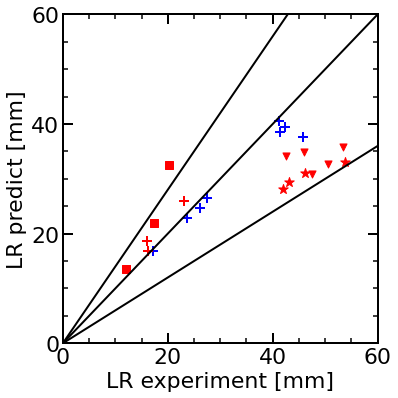

In [162]:
import math
import numpy as np
from matplotlib import pyplot
resultC2H2N2=grid1.predict(sXC2H2N2test)
resultC2H2He=grid1.predict(sXC2H2Hetest)
resultC2H6N2O=grid1.predict(sXC2H6N2Otest)
resultC3H6O2=grid1.predict(sXC3H6O2test)
resultC3H6N2O=grid1.predict(sXC3H6N2Otest)

plt.figure(figsize=(6,6))

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5


a=0.4
x = np.linspace(0,60, 100)
y = x*(1-a)
z = x*(1+a)
plt.plot(x, y,color='black')
plt.plot(x, z,color='black')

plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC2H2N2test[y_test_classC2H2N2 == 1], resultC2H2N2[y_test_classC2H2N2 == 1],s=50,color='blue', label = "AD_inside",marker='o')
plt.scatter(yC2H2N2test[y_test_classC2H2N2 == -1], resultC2H2N2[y_test_classC2H2N2 == -1],s=50,color='red', label = "AD_outside",marker='o')
plt.scatter(yC2H2Hetest[y_test_classC2H2He == 1], resultC2H2He[y_test_classC2H2He == 1],s=50,color='blue', label = "AD_inside",marker=",")
plt.scatter(yC2H2Hetest[y_test_classC2H2He == -1], resultC2H2He[y_test_classC2H2He == -1],s=50,color='red', label = "AD_outside",marker=",")
plt.scatter(yC2H6N2Otest[y_test_classC2H6N2O == 1], resultC2H6N2O[y_test_classC2H6N2O == 1],s=50,color='blue', label = "AD_inside",marker="v")
plt.scatter(yC2H6N2Otest[y_test_classC2H6N2O == -1], resultC2H6N2O[y_test_classC2H6N2O == -1],s=50,color='red', label = "AD_outside",marker="v")
plt.scatter(yC3H6O2test[y_test_classC3H6O2 == 1], resultC3H6O2[y_test_classC3H6O2 == 1],s=100,color='blue', label = "AD_inside",marker="+")
plt.scatter(yC3H6O2test[y_test_classC3H6O2 == -1], resultC3H6O2[y_test_classC3H6O2 == -1],s=100,color='red', label = "AD_outside",marker="+")
plt.scatter(yC3H6N2Otest[y_test_classC3H6N2O == 1], resultC3H6N2O[y_test_classC3H6N2O == 1],s=100,color='blue', label = "AD_inside",marker="*")
plt.scatter(yC3H6N2Otest[y_test_classC3H6N2O == -1], resultC3H6N2O[y_test_classC3H6N2O == -1],s=100,color='red', label = "AD_outside",marker="*")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

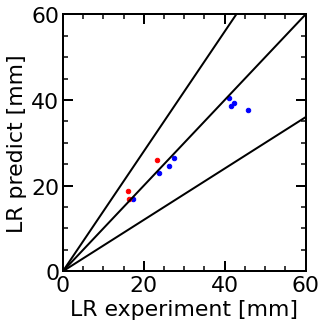

In [163]:
plt.figure(figsize=(5,5))



a=0.4
x = np.linspace(0,60, 100)
y = x*(1-a)
z = x*(1+a)
plt.plot(x, y,color='black')
plt.plot(x, z,color='black')

plt.plot([0, 60], [0, 60],color='black')

# データをプロットする

plt.scatter(yC3H6O2test[y_test_classC3H6O2 == 1], resultC3H6O2[y_test_classC3H6O2 == 1],s=20,color='blue', label = "AD_inside")
plt.scatter(yC3H6O2test[y_test_classC3H6O2 == -1], resultC3H6O2[y_test_classC3H6O2 == -1],s=20,color='red', label = "AD_outside")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")